In [3]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Optional for nicer plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Step 2: Load dataset
df = pd.read_csv("hotel_bookings.csv")  # Change path as needed
print(df.shape)
df.head()


(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Step 3: Basic info
df.info()
df.describe()
df.isnull().sum() / len(df) * 100  # Missing value percentage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [5]:
# Step 4: Clean missing values
df['children'].fillna(0, inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Convert agent and company to int
df['agent'] = df['agent'].astype(int)
df['company'] = df['company'].astype(int)


In [6]:
# Step 5: Feature Engineering
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['is_family'] = np.where((df['adults'] > 0) & (df['children'] > 0), 1, 0)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [7]:
# Step 6: Cancellation rate
cancel_rate = df['is_canceled'].mean()
print(f"Overall Cancellation Rate: {cancel_rate:.2%}")

Overall Cancellation Rate: 37.04%


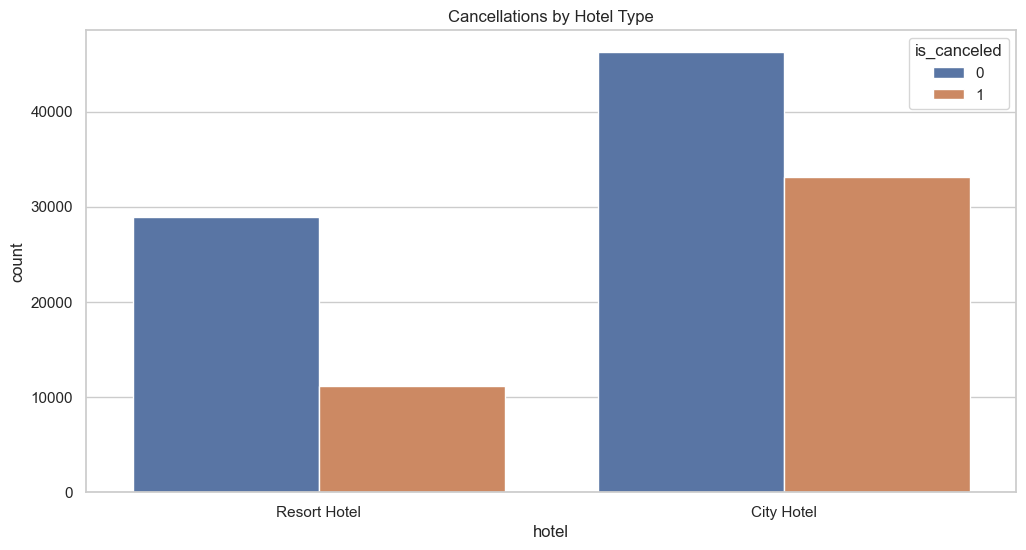

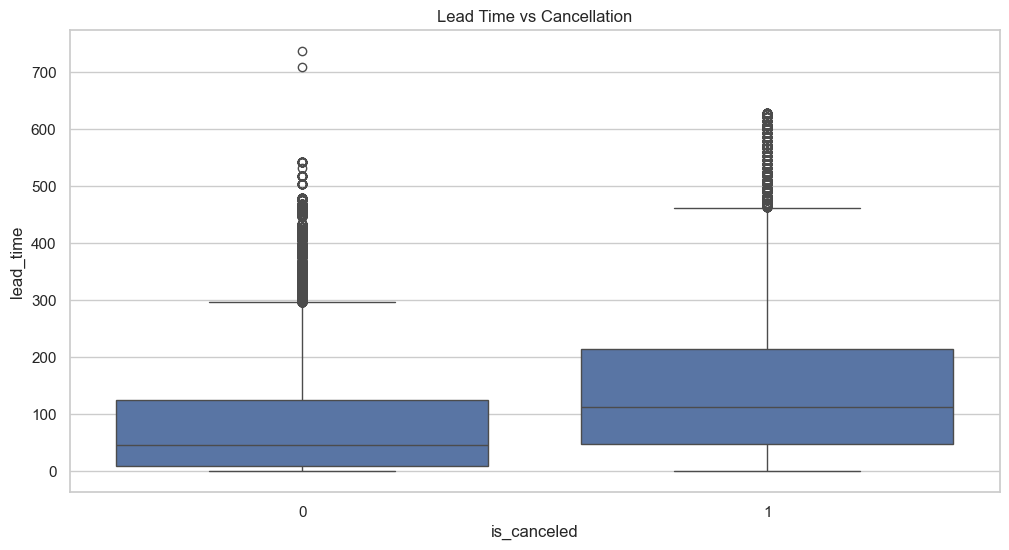

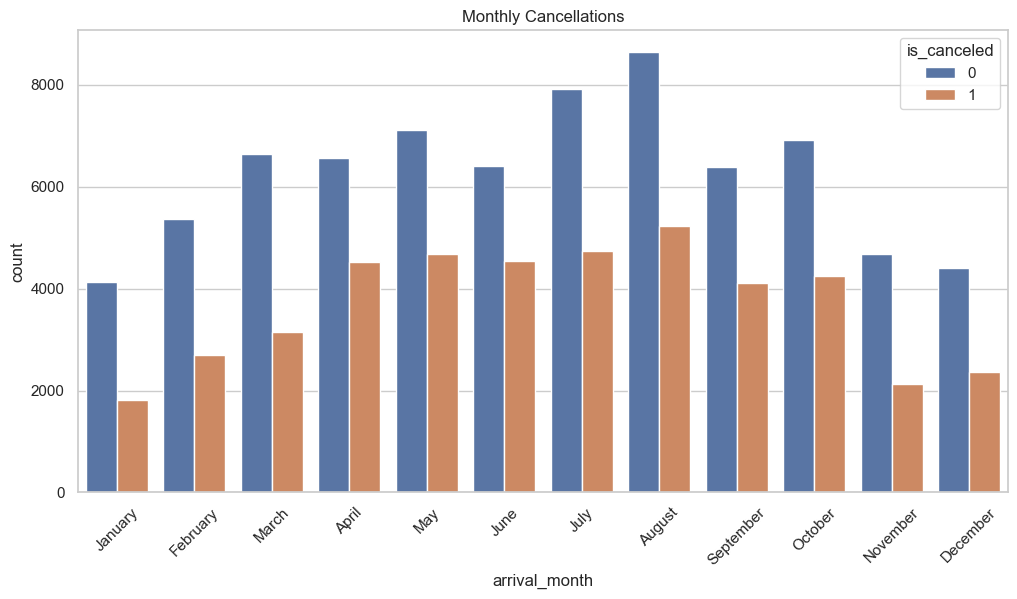

In [8]:
# Step 7: Visualizations

# Hotel type vs cancellation
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title("Cancellations by Hotel Type")
plt.show()

# Lead time
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title("Lead Time vs Cancellation")
plt.show()

# Monthly cancellation trends
df['arrival_month'] = df['arrival_date_month']
order = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df, x='arrival_month', hue='is_canceled', order=order)
plt.xticks(rotation=45)
plt.title("Monthly Cancellations")
plt.show()


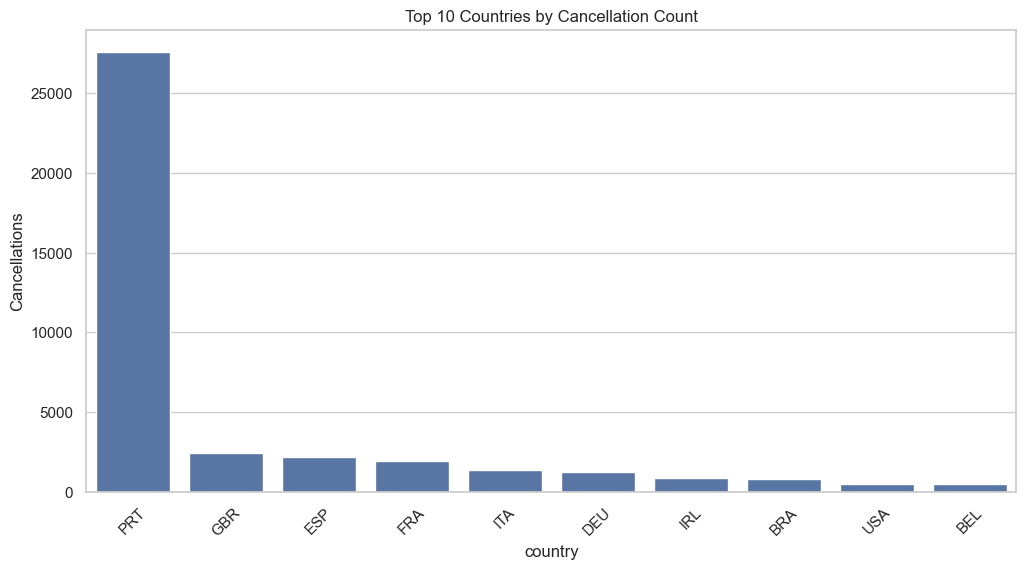

In [9]:
# Step 8: Cancellation by country (Top 10)
top_countries = df[df['is_canceled'] == 1]['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Cancellation Count")
plt.xticks(rotation=45)
plt.ylabel("Cancellations")
plt.show()

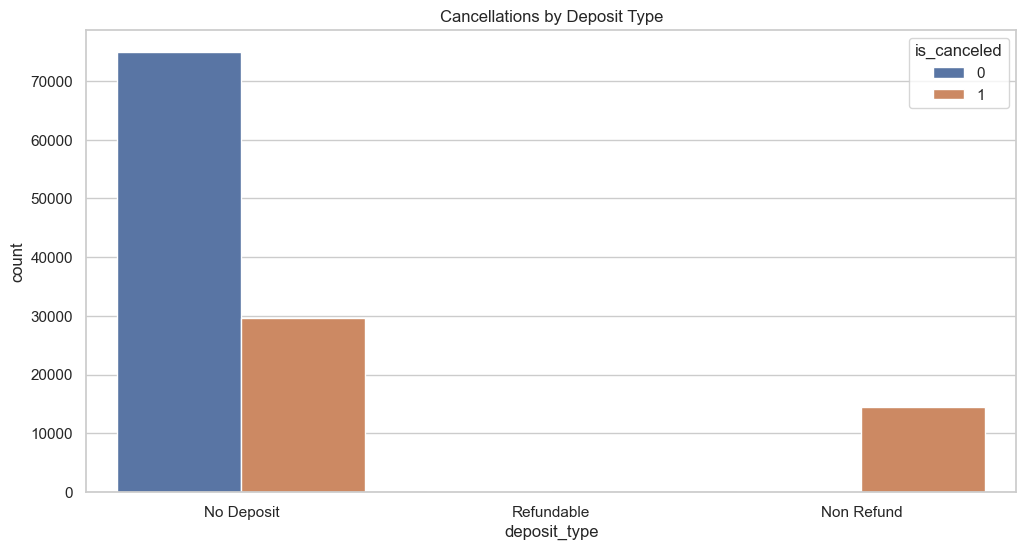

In [10]:
# Step 9: Deposit type impact
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title("Cancellations by Deposit Type")
plt.show()